In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Inferential Statistic

This report will investigate the [Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect), by attempting to answer the questions that were provided below. However, this report will based on the data provided by Udacity, which contains the text color naming duration in the two settings (congruent task *E1* and incongruent task *E2*). 

### 1. What is our independent variable? What is our dependent variable?

As the data contains only the duration of each experiments; thus, the **dependent variable** will be the **each task performance (duration to interpret the color)**. In the other hand, the **independent variable** will be **congruent/incongruent treatment (the color of the text)**.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

As for I want to see whether the average duration of *E2* ($\mu_2$) will be larger than average duration of *E1* ($\mu_1$), which indicating that *E2* will need longer time to be interpreted. Thus, I construct the hypotheses:

Null Hypothesis:
$$H_0: \mu_2-\mu_1 \leq 0$$

Alternate Hypothesis:
$$H_a: \mu_2-\mu_1 > 0$$

Consequently, I intend to conduct a one-tail t-test ($\alpha = .05$) as there is no population parameters known in this case. Furthermore, as the sample is too small ($n<30$), it is recommended to use t distribution ([source](http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals_print.html)). In detail, as the two tasks performed by the same participants; thus, it is appropriate to use dependent sample t-test

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

Here I load the data:

In [2]:
df = pd.read_csv('data/stroopdata.csv')
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


Now, I want to add a new column that contain each entries difference ($\mu_2-\mu_1$). I also will provide mean of the difference and its standard deviation.

In [3]:
df['d'] = df['Incongruent'] - df['Congruent']
df

,Congruent,Incongruent,d
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134
5,12.238,20.878,8.640
6,14.692,24.572,9.880
7,8.987,17.394,8.407
8,9.401,20.762,11.361
9,14.480,26.282,11.802


In [4]:
mean_d = df['d'].mean()
mean_d

7.964791666666667

In [5]:
std_d = df['d'].std()
std_d

4.864826910359056

Thus, based on the data I found the difference average or the point estimate ($\bar{x}_d$) = 7.96 and difference standard deviation ($\sigma_d$) = 4.86. In addition, degree of freedom ($df = n - 1$) = 23.  However, due to lack of number of sample, I assume that data is normally distributed given the mean is the central value and std as the variability.

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Below are the plot of the data:

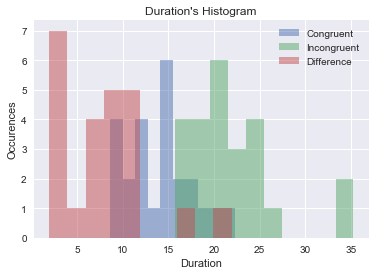

In [6]:
plt.hist(df['Congruent'], 
         histtype = 'stepfilled', alpha = 0.5)
plt.hist(df['Incongruent'], 
         histtype = 'stepfilled', alpha = 0.5)
plt.hist(df['d'], 
         histtype = 'stepfilled', alpha = 0.5)
plt.ylabel('Occurences')
plt.xlabel('Duration')
plt.title("Duration's Histogram")
plt.legend(['Congruent','Incongruent', 'Difference'])
plt.show()

As I mentioned before I assume the data are normally distributed if the sample is large enough since we have only small value of data that does not show normal distribution. Following is the plot of the simple data from given mean and std ([source](https://stackoverflow.com/questions/10138085/python-pylab-plot-normal-distribution)).

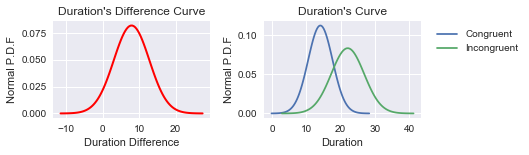

In [7]:
x = np.linspace(mean_d - 4*std_d, 
                mean_d + 4*std_d, 
                100)
plt.subplot(221)
line = plt.plot(x,
                plt.mlab.normpdf(x, 
                                 mean_d, 
                                 std_d))

plt.setp(line, 
         color='r', 
         linewidth=2.0)

plt.ylabel('Normal P.D.F')
plt.xlabel('Duration Difference')
plt.title("Duration's Difference Curve")

y = np.linspace(df['Congruent'].mean() - 4* df['Congruent'].std(),  
                df['Congruent'].mean() + 4* df['Congruent'].std(), 
                100)
plt.subplot(222)
plt.plot(y,plt.mlab.normpdf(y,  
                            df['Congruent'].mean(),  
                            df['Congruent'].std()))

z = np.linspace(df['Incongruent'].mean() - 4* df['Incongruent'].std(),  
                df['Incongruent'].mean() + 4* df['Incongruent'].std(), 
                100)
plt.plot(z,plt.mlab.normpdf(z,  
                            df['Incongruent'].mean(), 
                            df['Incongruent'].std()))


plt.ylabel('Normal P.D.F')
plt.xlabel('Duration')
plt.title("Duration's Curve")
plt.legend(['Congruent','Incongruent'],bbox_to_anchor=(1.05, 1), loc=0)

plt.subplots_adjust(left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

As seen in Duration's Curve, there are some intersection between the two curves. However, it shows the Incongruent curve have a larger variance.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Here I will perform statistical test. First, I have to find the t-statistic of the difference:
$$t_{statistic} = \frac{\bar{x}_d}{\frac{\sigma_d}{\sqrt{n}}}$$

Where,
$$\bar{x}_d = 7.96$$
$$\sigma_d = 4.86$$
$$n = 24$$
$$t_{critical} = 1.714 $$

Thus, 
$$t_{statistic} = \frac{7.96}{\frac{4.86}{\sqrt{24}}}$$

$$t_{statistic} = 8.02 > t_{critical}$$

Therefore, the $H_0$ is rejected because it is evident that the intervention may make performance decreasing significantly ($P_{value} = ~0.0001$) (duration to name the color of the text increasing). 

Furthermore, as I have defined that I am using 95% confidence. Therefore,

$$CI: (5.90, 10.01)$$

Which imply that I am 95% confident that the intervention may increase the duration to interpret the colours by 5.90 seconds to 10.01 seconds.


### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

To check whether the dependent variable may responsible for the effect, I need to count $r^2$:
$$r^2=\frac{t_{statistic}^2}{t_{statistic}^2+df}$$

Thus,
$$r^2= 0.74$$

It can be concluded that mostly (74%) the congruent/incongruent treatment is reponsible for the effect. Based on [here](https://faculty.washington.edu/chudler/words.html) and [here](https://d2l.deakin.edu.au/d2l/eP/presentations/presentation_preview_popup.d2l?presId=67655), there are two main cause of this:
    1. People tend to read words faster than interpreting colours.
    2. Interpreting colours need more attention than reading words thus people tend to read words first.
    
An alternative may can be seen on memorising in crowdy area. the dependent variable is the crowdness of the area and the independent variable will be memorising performance. Some people may get distracted to actual things that happening to them then memorising that need a high attention.